<a href="https://colab.research.google.com/github/Kabir2919/Deep-Fake-Audio-Recognition/blob/main/deepfake_detection_final_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install numpy
!pip install librosa
!pip install matplotlib
!pip install seaborn
!pip install tensorflow
!pip install tqdm
!pip install xgboost
!pip install scikit-learn
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 99.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [ ]:
!pip install numpy==1.26.4

In [ ]:
!pip install --upgrade --force-reinstall tensorflow catboost numba

  Using cached catboost-1.2.7-cp311-cp311-manylinux2014_x86_64.whl.metadata (1.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.2 MB/s eta 0:00:00
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.2 MB/s eta 0:00:00
Using cached catboost-1.2.7-cp311-cp311-manylinux2014_x86_64.whl (98.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 100.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import numpy as np
import librosa
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Input,
    Conv1D,
    LSTM,
    Bidirectional,
    Dropout,
    BatchNormalization,
    Dense,
    MaxPooling1D,
    concatenate,
    GlobalAveragePooling1D,
    Flatten,
)

from tqdm.notebook import tqdm
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
from keras.models import save_model, load_model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# data_file='/content/drive/MyDrive/extracted_features_new.csv'
data_file='/content/extracted_features2_26mfcc.csv'

In [ ]:
data_file

'/content/extracted_features2_26mfcc.csv'

In [ ]:
audio_data = pd.read_csv(data_file)

In [ ]:
label_encoder = LabelEncoder()
audio_data['LABEL'] = label_encoder.fit_transform(audio_data['LABEL'])

audio_data

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc18,mfcc19,mfcc20,mfcc21,mfcc22,mfcc23,mfcc24,mfcc25,mfcc26,LABEL
0,-0.778782,-1.139359,-0.837353,-0.990933,-0.795138,-0.734372,-0.852318,-1.058199,0.332959,-1.021614,...,1.021091,0.524785,0.949715,0.629164,1.152731,1.569000,1.215536,1.611046,1.052295,1
1,1.041610,1.705655,0.477109,0.947152,0.798342,-0.196662,1.241862,1.112664,-0.063222,-0.440030,...,-1.585637,-0.928251,-0.937954,-0.251815,0.690261,-0.063842,0.075848,-0.206741,0.196500,1
2,1.071299,2.117925,0.336604,0.704873,0.233265,-0.125598,1.895218,2.000760,0.784136,1.560578,...,-1.004469,-1.451923,-0.252937,-0.871461,0.647026,-0.712948,-0.965357,0.196052,-0.391316,1
3,1.132479,-0.148574,1.006260,1.222916,1.193680,0.197659,0.293437,0.144794,-0.693282,-0.232284,...,-1.133460,-0.648498,1.280161,0.310586,0.356969,0.711753,1.276566,1.505729,1.781617,1
4,0.954295,0.574590,1.213798,1.223303,1.264584,1.192558,0.465974,0.635860,-0.841225,0.590859,...,-1.529544,-1.597284,-1.094696,-1.065787,-0.068540,-0.517808,1.215434,-1.450888,-1.352187,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43155,-1.439747,-1.581141,-0.770644,-1.023866,-0.713876,-1.187777,-2.045512,-1.434041,-0.026017,-0.203519,...,1.676084,1.166950,1.129278,1.103638,1.161690,1.328078,0.530269,1.027469,0.716750,0
43156,0.125680,0.145059,0.529473,0.351635,0.498384,0.238820,0.816845,0.676229,-1.856630,0.706005,...,-0.317251,-1.386916,0.396010,-0.137822,-0.088759,0.253762,0.405206,0.165576,0.466725,0
43157,1.081361,0.628269,-0.134076,0.057354,-0.202897,-0.135415,0.063184,0.216119,0.796735,1.150547,...,0.233591,0.434054,0.759974,0.791154,0.226455,0.584840,-0.262115,0.317892,0.532602,0
43158,0.205507,-0.553373,-0.404967,0.176031,-0.410619,-0.203057,-0.208330,-0.105820,0.871441,-0.882514,...,1.274643,-0.099612,-0.050794,1.249402,0.001687,0.322440,1.002383,0.683264,0.198932,0


In [ ]:
y = audio_data['LABEL']
X = audio_data.drop('LABEL', axis = 1)

In [ ]:
real_df = audio_data[audio_data['LABEL'] == 1]
fake_df = audio_data[audio_data['LABEL'] == 0]

In [ ]:
len(real_df)

12493

In [ ]:
# Set n to the minimum available size
n_samples = min(len(real_df), len(fake_df))  # Ensures no sampling errors

# Perform sampling
real_df_downsampled = real_df.sample(n=n_samples, random_state=42)
fake_df_downsampled = fake_df.sample(n=n_samples, random_state=42)

print("Downsampled Real DataFrame Size:", len(real_df_downsampled))
print("Downsampled Fake DataFrame Size:", len(fake_df_downsampled))

# Combine the datasets and shuffle
balanced_audio_data = pd.concat([real_df_downsampled, fake_df_downsampled]).sample(frac=1, random_state=42)

# Split features and labels
X = balanced_audio_data.drop(columns=['LABEL'])
y = balanced_audio_data['LABEL']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, shuffle=True, random_state=42)

# Print class distribution
print(y_train.value_counts(), y_test.value_counts())

Downsampled Real DataFrame Size: 12493
Downsampled Fake DataFrame Size: 12493
LABEL
1    9994
0    9994
Name: count, dtype: int64 LABEL
0    2499
1    2499
Name: count, dtype: int64


In [ ]:
real_df_downsampled

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc18,mfcc19,mfcc20,mfcc21,mfcc22,mfcc23,mfcc24,mfcc25,mfcc26,LABEL
2884,0.693092,1.006137,1.254979,1.521907,1.284574,1.800656,1.376659,-0.082854,1.032068,-1.907273,...,-1.749872,-1.291741,-0.709700,-1.843091,-0.330070,-1.338741,-2.008619,-1.276835,-2.112992,1
5460,-0.667006,-0.877096,-0.476519,-0.162301,-0.199561,-0.234017,-0.900081,-1.470866,1.222150,-1.264489,...,0.779682,-0.393564,-0.360480,0.171117,-0.249530,0.584499,-0.340110,0.260884,-0.144470,1
7959,1.564114,-0.154554,1.232935,1.187205,1.300858,1.918138,0.961308,0.054372,-1.221249,0.217399,...,-1.761787,-0.800349,-1.552719,-2.192797,-2.265576,-1.221087,-2.154226,-1.442837,-0.701553,1
9246,-0.185059,0.039808,-0.285085,-0.021082,-0.167681,-0.313163,-0.175680,-0.842973,1.947914,-0.984660,...,0.146158,-0.232764,0.445805,-0.138364,0.126133,-0.253929,-0.802828,0.312923,-0.806705,1
11228,0.826876,-0.667167,1.119088,1.260329,1.424172,1.422239,0.233548,-0.838758,0.337904,-0.429185,...,0.303066,-0.615562,-1.498726,-1.439553,0.668555,0.072963,0.142640,0.101658,-0.588090,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,-0.297860,-0.924477,-0.107283,0.050431,0.049821,0.605303,-0.783403,-1.404014,2.086250,-1.520525,...,0.003660,-0.300918,0.672758,-0.580416,0.178729,-0.044244,-0.839437,0.402944,-0.793520,1
5191,-0.216852,0.516691,0.568225,0.474891,0.719528,1.013276,0.746469,-0.922770,-0.067429,-1.037385,...,-0.884966,-1.272659,-0.586643,-0.993148,-0.567805,-0.421069,0.677212,0.567376,1.042356,1
5390,-0.896176,-1.113365,-1.381344,-1.265879,-1.358857,-0.927039,-1.553305,-0.668751,0.694055,-1.549685,...,0.382754,-0.726352,0.290956,-0.418937,-0.051228,0.828388,-0.623176,0.362790,-0.204916,1
860,0.307517,-0.817645,-0.573629,-0.066606,-0.150103,-1.243530,-1.316949,-0.367193,0.520210,-0.120013,...,0.277424,0.663087,0.788912,0.456041,0.705741,0.543919,0.394158,0.773814,-0.130960,1


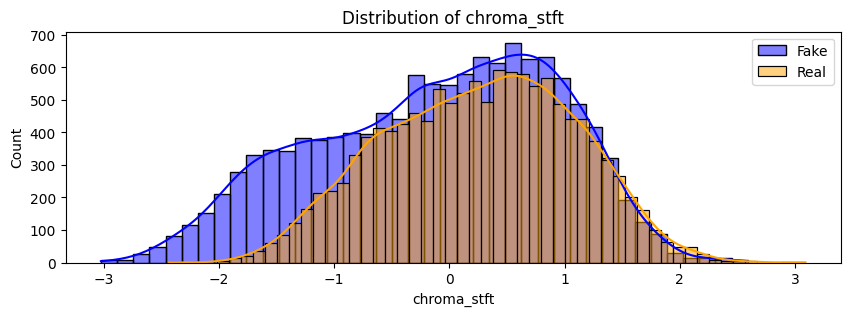

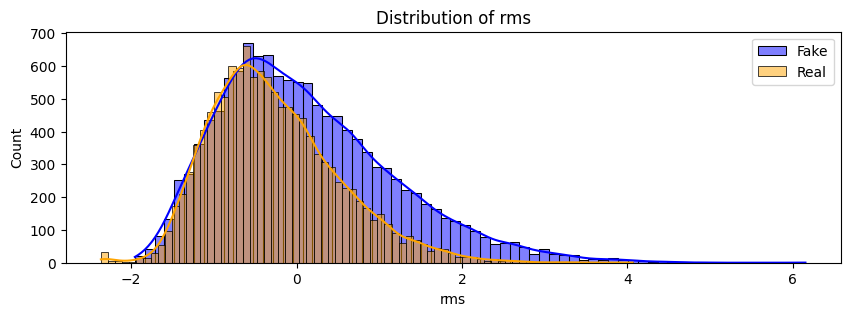

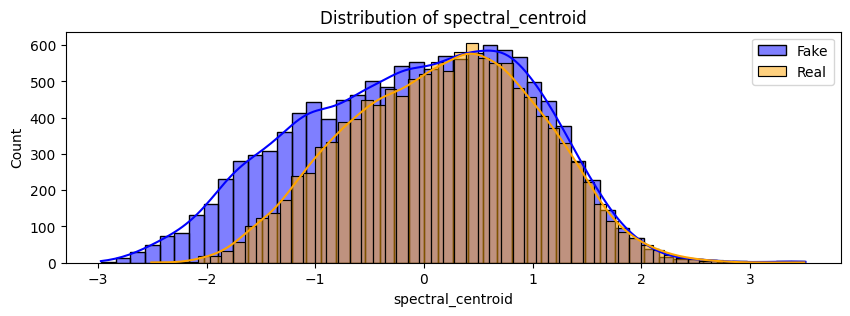

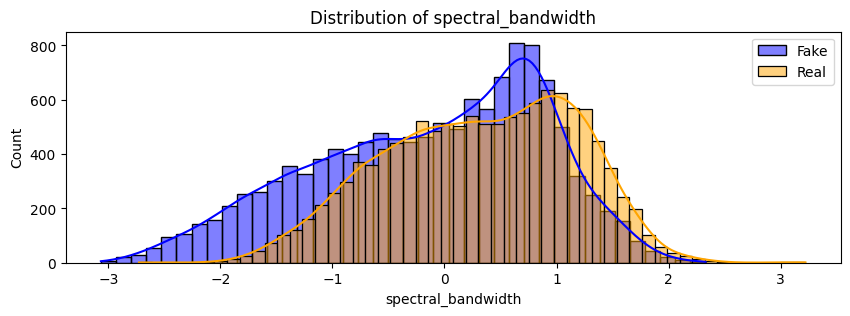

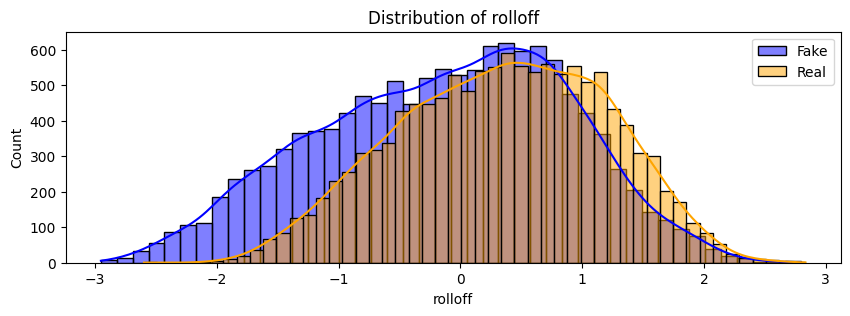

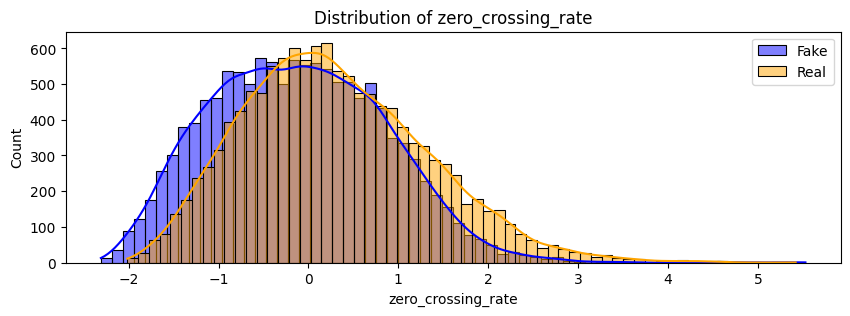

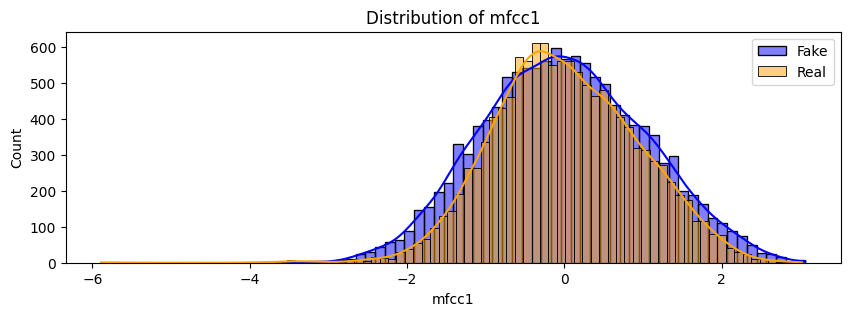

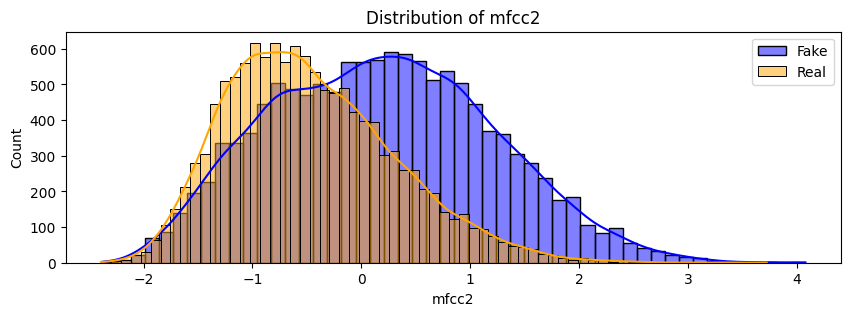

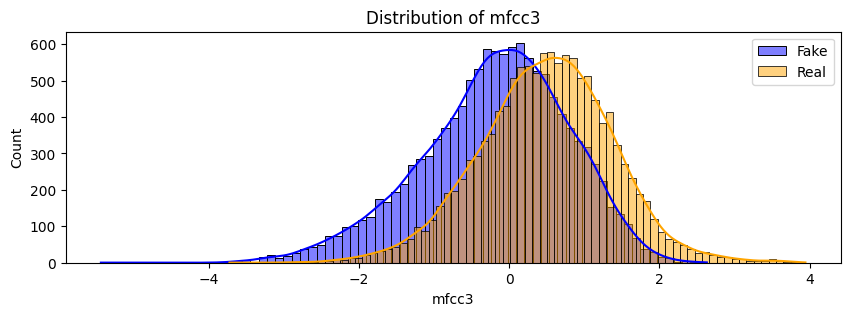

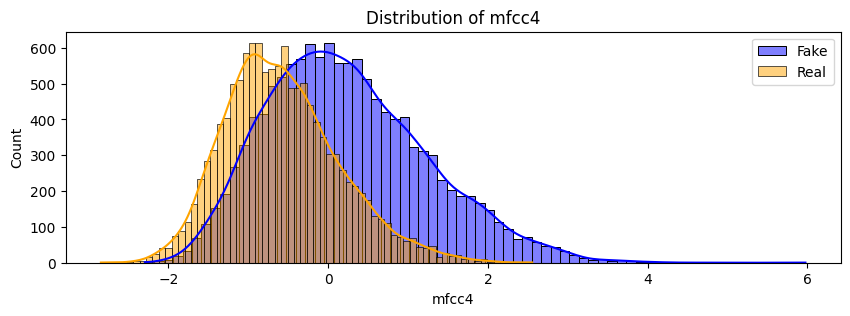

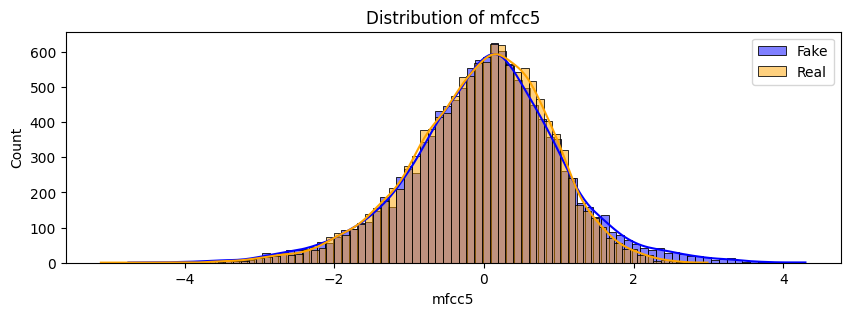

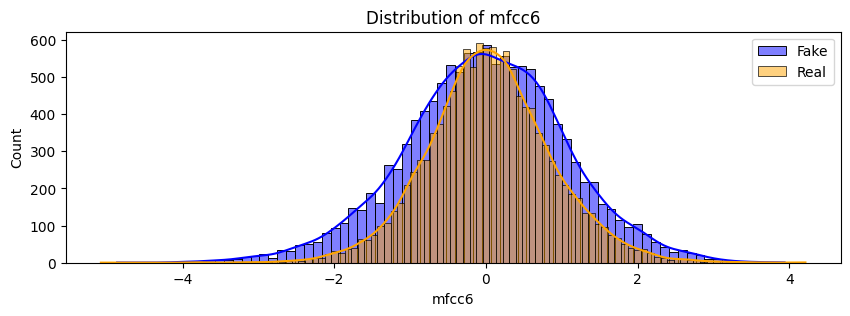

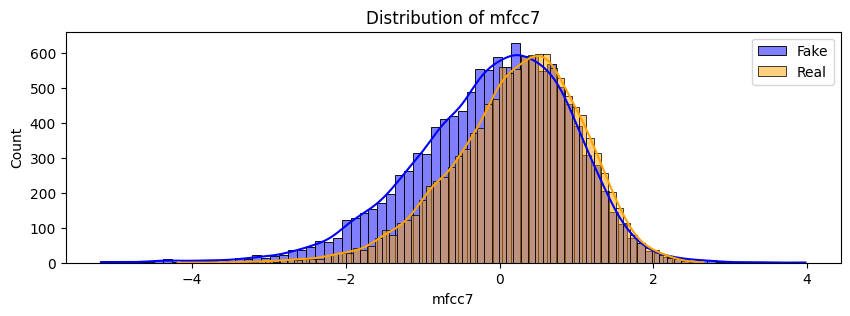

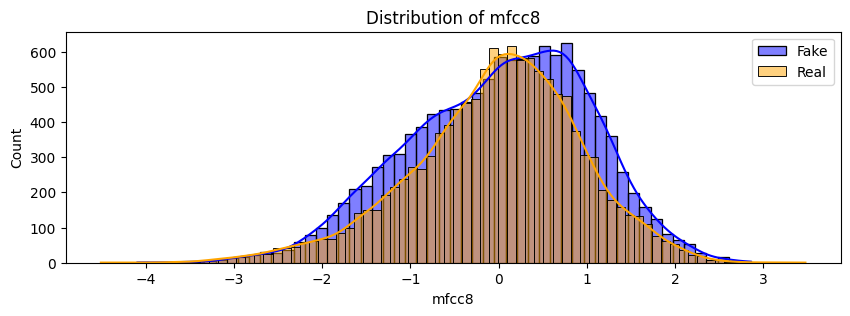

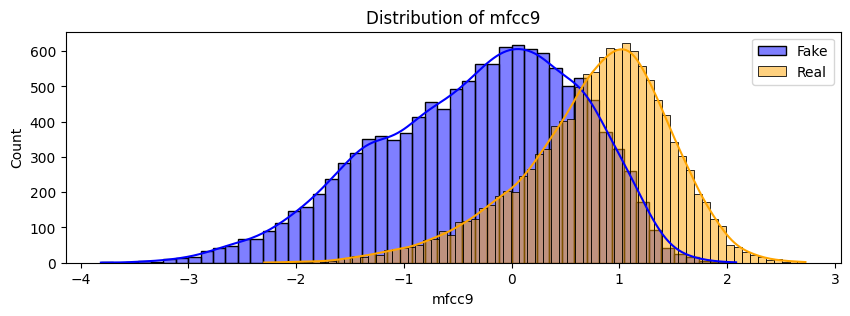

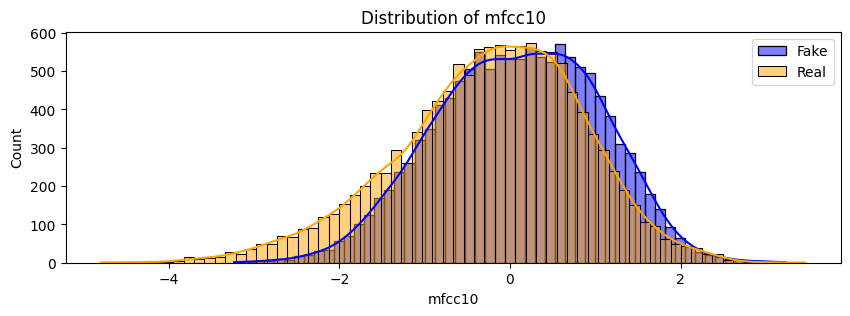

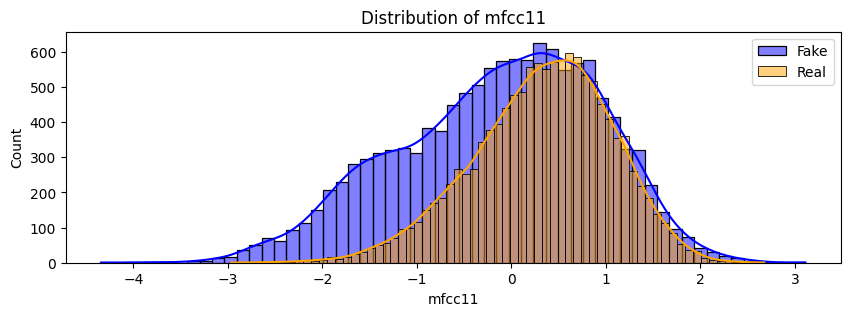

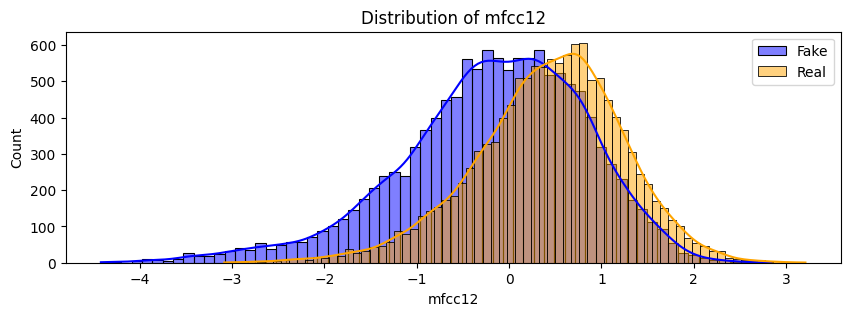

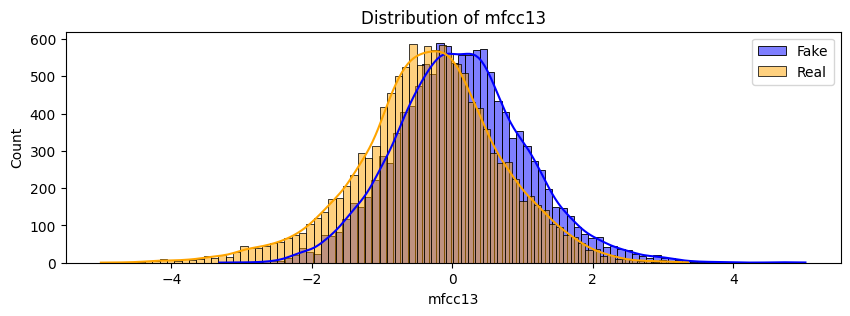

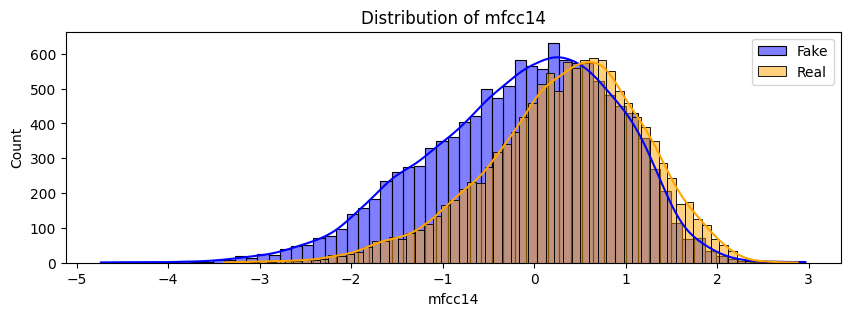

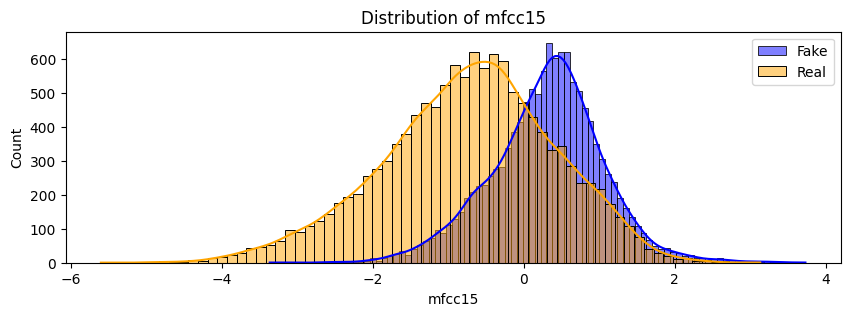

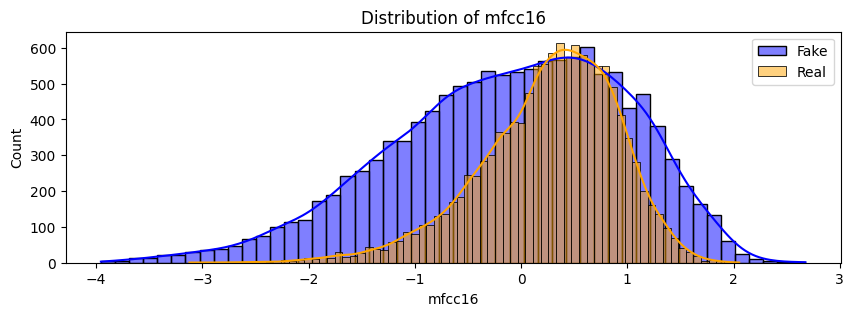

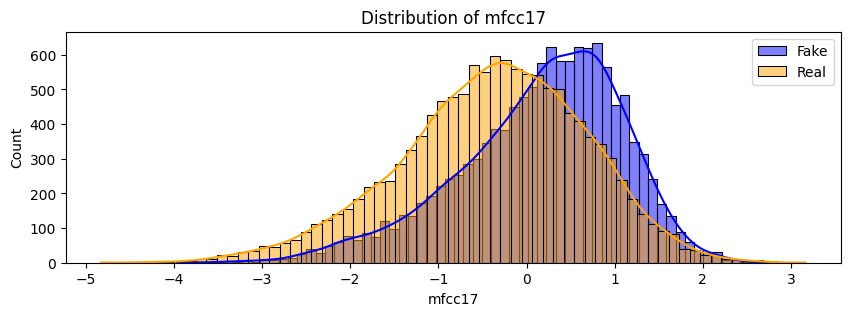

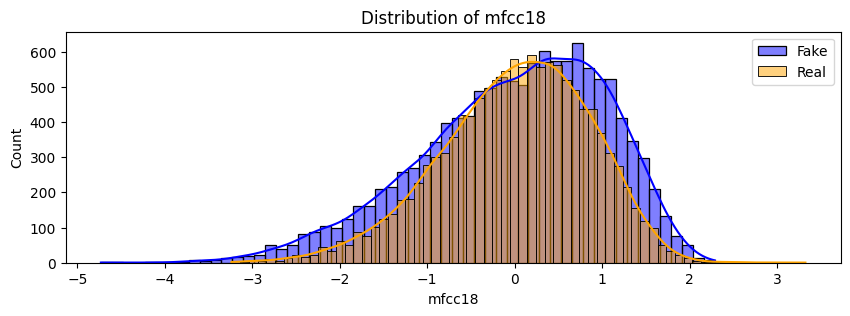

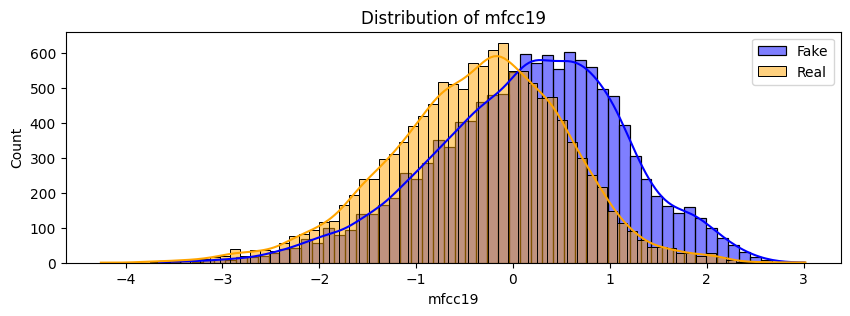

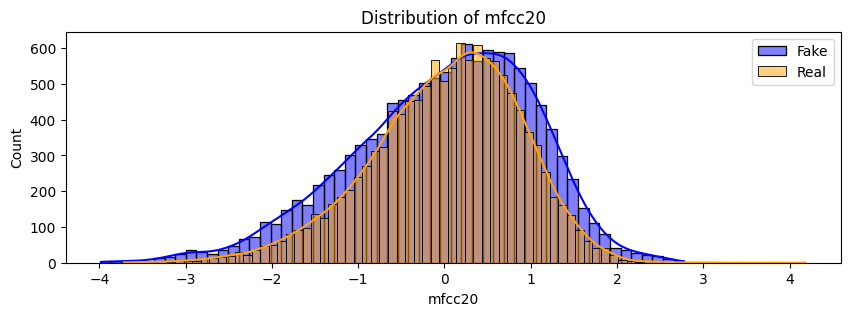

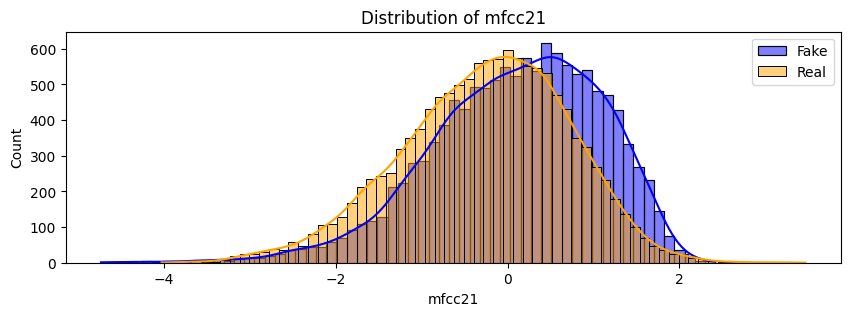

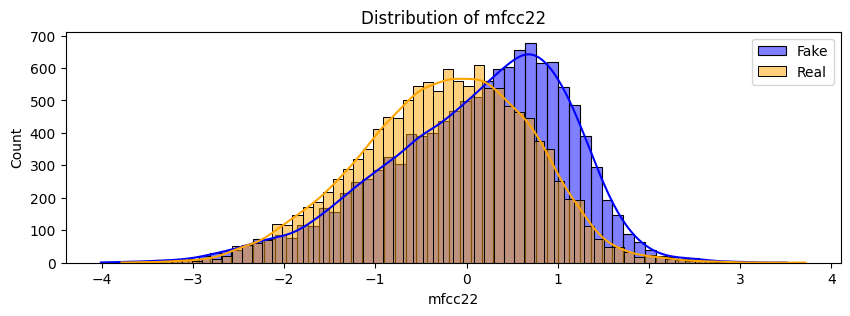

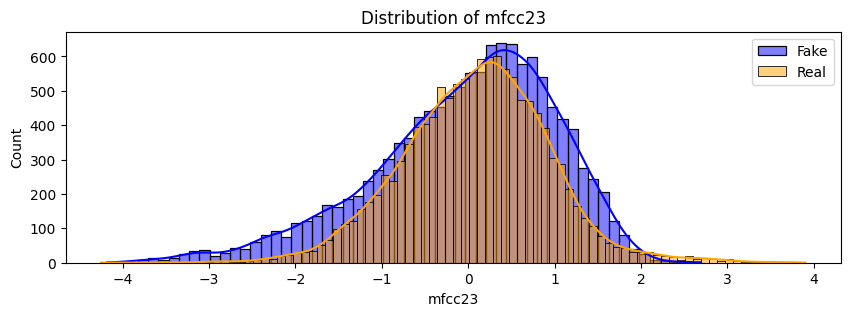

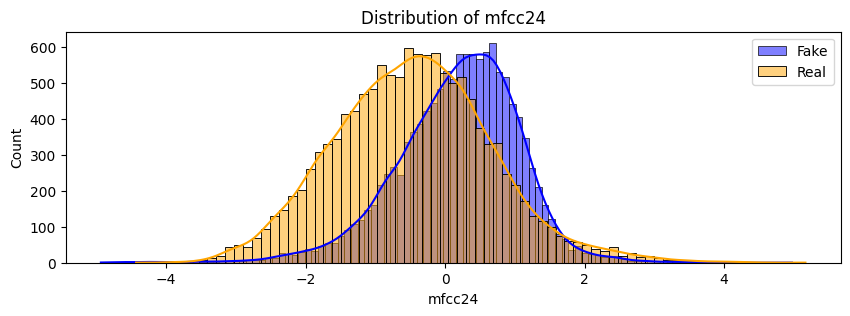

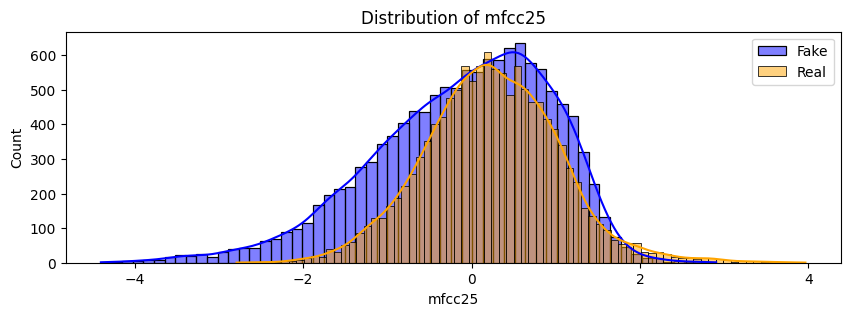

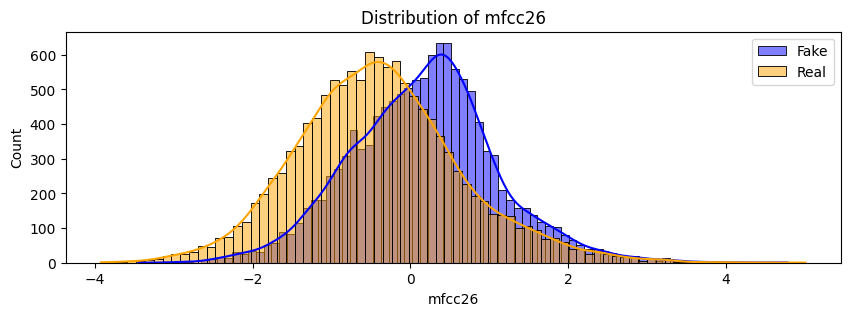

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

for column in X:
    plt.figure(figsize=(10, 3))
    sns.histplot(fake_df_downsampled[column], kde=True, label='Fake', color='blue')
    sns.histplot(real_df_downsampled[column], kde=True, label='Real', color='orange')

    plt.title(f'Distribution of {column}')
    plt.legend()
    plt.show()


In [ ]:
# warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
# for column in X:
#     plt.figure(figsize=(10, 3))
#     sns.histplot(audio_data[audio_data['LABEL'] == 0][column], kde=True, label='Fake', color='blue')
#     sns.histplot(audio_data[audio_data['LABEL'] == 1][column], kde=True, label='Real', color='orange')
#     plt.title(f'Distribution of {column}')
#     plt.legend()
#     plt.show()

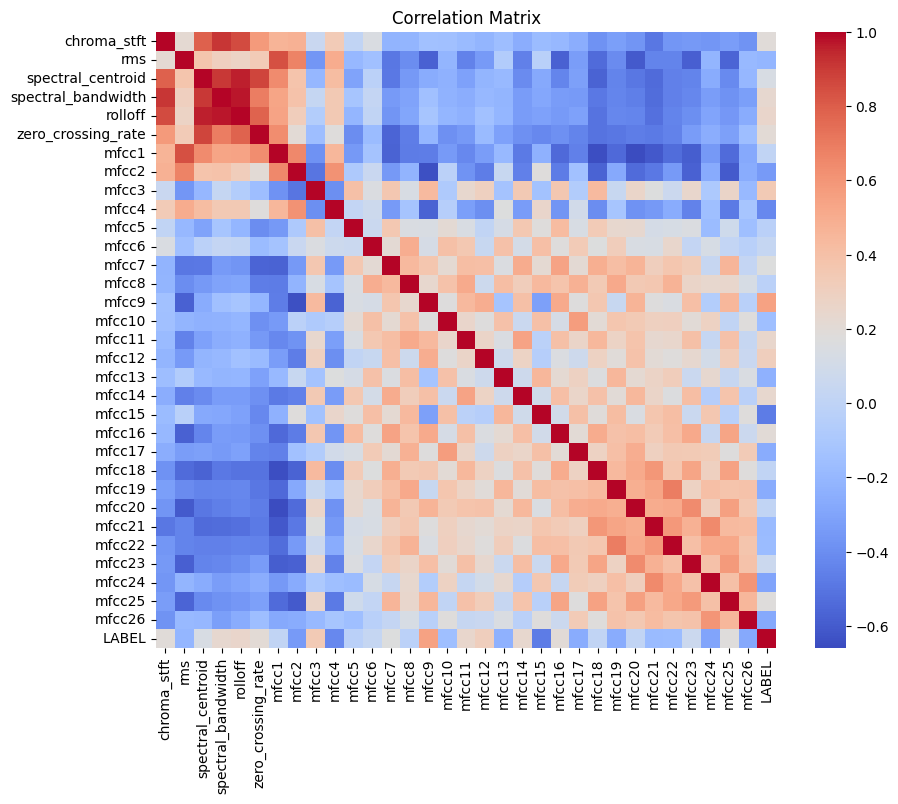

In [ ]:
import seaborn as sns

correlation_matrix = balanced_audio_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
X_train

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc17,mfcc18,mfcc19,mfcc20,mfcc21,mfcc22,mfcc23,mfcc24,mfcc25,mfcc26
147,0.913369,-0.748020,0.636107,1.057554,1.134825,-0.015624,-0.861278,0.037543,0.714435,0.266479,...,-0.001590,0.683956,0.113676,0.387743,-0.219229,-0.080514,-0.687271,0.363495,0.296564,-1.656926
9033,0.422047,0.122059,0.893621,0.824629,0.809892,1.416426,1.032631,-0.459193,-1.081357,-1.650267,...,-3.115393,-0.944262,-0.190118,0.109010,0.427942,0.934671,1.993308,2.476895,0.837450,0.532212
7058,0.696306,-0.047862,1.091765,0.918929,1.197267,1.974035,0.826227,-0.541995,0.019995,-0.790396,...,-1.018287,-1.125687,-0.030818,-0.462895,-2.334468,-1.550085,-0.333818,-0.877602,-0.510002,-0.216898
33559,0.572919,-0.308196,-0.376850,0.107205,0.074807,-0.990167,-0.322500,0.710217,-0.107536,-0.076295,...,0.840655,0.391516,0.670703,0.368631,0.237465,1.169700,0.578563,0.484410,-0.352410,-1.189158
11405,0.628648,0.432193,0.956465,0.812418,0.901862,2.306201,1.735050,0.050274,0.584769,-1.218522,...,-2.068695,-0.350613,-3.715191,0.903571,-2.848373,-0.589355,-0.652920,-2.155574,-0.314201,-2.774089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10681,0.209385,0.657244,-0.017340,0.167298,-0.059786,-0.143611,0.732490,1.095531,-0.756038,-0.296390,...,0.494391,-0.181112,-1.864252,-0.313698,-0.052708,-0.368413,0.718541,-0.350050,-0.173000,0.122731
18063,0.519760,-0.946915,0.075289,-0.455895,-0.265820,0.865428,0.178992,-0.053239,-0.229440,0.407502,...,1.107601,0.334936,0.880237,0.322181,-0.713158,1.007439,0.373541,-0.533782,0.935749,0.457949
24110,0.365810,-0.908507,-0.160783,-0.188614,-0.329356,0.259356,-0.377888,0.798698,-0.072339,-0.299192,...,-0.740531,0.169626,-0.310969,0.058282,-0.204320,-1.230577,1.007981,-0.209309,-0.558806,0.191553
6329,-0.420224,-1.416083,-0.099948,-0.273383,-0.021431,0.711284,-0.736531,-1.258875,0.132439,-1.534988,...,-0.583289,-0.088993,0.077666,0.697437,0.765541,1.128277,0.436888,0.821406,1.138422,1.395615


In [ ]:
print(f"X_train shape: {X_train.shape}")

X_train shape: (19988, 32)


In [ ]:
import numpy as np

# Ensure X_train is a NumPy array
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.to_numpy()

# Ensure y_train is a NumPy array
if isinstance(y_train, pd.Series) or isinstance(y_train, pd.DataFrame):
    y_train = y_train.to_numpy()

# Get number of samples and features
num_samples, num_features = X_train.shape  # (4128, 19)

if num_features < 10:
    raise ValueError(f"X_train has only {num_features} features, but at least 10 are required.")

# Define timesteps: We take overlapping windows of 10 features
num_timesteps = num_features - 9  # 19 - 9 = 10 timesteps
X_reshaped = np.zeros((num_samples, num_timesteps, 10))

# Reshape X_train into 3D format (samples, timesteps, 10)
for i in range(num_timesteps):
    X_reshaped[:, i, :] = X_train[:, i:i + 10]

# Reshape y_train to (samples, 1)
y_train = y_train.reshape(-1, 1)

# Update X_train
X_train = X_reshaped

# Print final shapes
print(f"X_train shape: {X_train.shape}")  # Expected: (4128, 10, 10)
print(f"y_train shape: {y_train.shape}")  # Expected: (4128, 1)

X_train shape: (19988, 23, 10)
y_train shape: (19988, 1)


In [ ]:
import numpy as np
import pandas as pd

def preprocess_data(X, y):
    # Ensure X is a NumPy array
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    # Ensure y is a NumPy array
    if isinstance(y, pd.Series) or isinstance(y, pd.DataFrame):
        y = y.to_numpy()

    # Get shape details
    num_samples = X.shape[0]
    num_features = X.shape[1]

    # Ensure we have at least 10 features
    if num_features < 10:
        raise ValueError(f"X has only {num_features} features, but at least 10 are required.")

    # Determine number of timesteps
    num_timesteps = min(17, num_features - 9)

    # Initialize 3D array
    X_reshaped = np.zeros((num_samples, num_timesteps, 10))

    # Reshape X into 3D format
    for i in range(num_timesteps):
        X_reshaped[:, i, :] = X[:, i:i + 10]

    # Reshape y
    y_reshaped = np.reshape(y, (y.shape[0], 1))

    return X_reshaped, y_reshaped

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

### Model 1: **BiLSTM**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import ReduceLROnPlateau

model1 = Sequential()

# Bidirectional LSTM
model1.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(64, return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(32)))
model1.add(LayerNormalization())

# Fully Connected Layers
model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.4))
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.4))

# Output Layer
model1.add(Dense(1, activation='sigmoid'))

# Optimizer
optimizer = tf.keras.optimizers.AdamW(learning_rate=0.00003)

# Compile Model
model1.compile(optimizer=optimizer, loss=BinaryCrossentropy(), metrics=['accuracy'])

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Summary
model1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 23, 256)             │         142,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 23, 128)             │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 23, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization                  │ (None, 64)                  │             128 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 350,657 (1.34 MB)

 Trainable params: 350,657 (1.34 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history1 = model1.fit(X_train, y_train, batch_size=128, epochs=50)

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.5565 - loss: 0.7148
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6569 - loss: 0.6119
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.7034 - loss: 0.5624
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.7438 - loss: 0.5065
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7741 - loss: 0.4618
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7906 - loss: 0.4274
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8077 - loss: 0.3962
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8226 - loss: 0.3749
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.8266 - loss: 0.3663
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8415 - loss: 0.3414
Epoch 11/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8455 - loss: 0.3305
Epoch 12/50
157/157 ━━━━━━━━━━━━━━━━━━━━

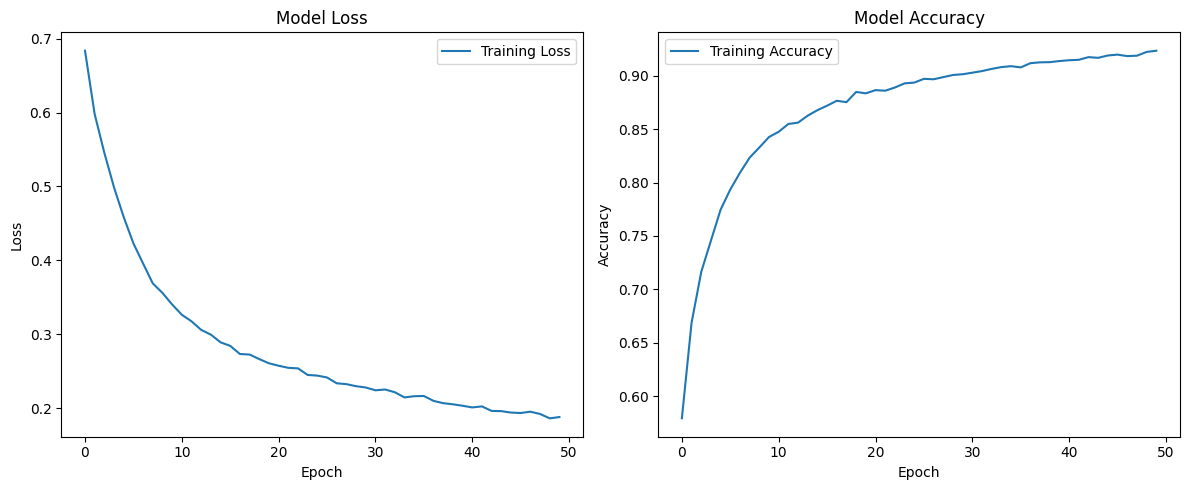

In [ ]:
import matplotlib.pyplot as plt

# Plot Training & Validation Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show plots
plt.tight_layout()

In [ ]:
# Ensure X_test is a NumPy array
X_test_np = X_test.to_numpy()

# Reshape X_test into 3D format (samples, timesteps, features)
X_test_reshaped = np.zeros((X_test_np.shape[0], num_timesteps, 10))

# Reshape X_test to match X_train shape
for i in range(num_timesteps):
    X_test_reshaped[:, i, :] = X_test_np[:, i:i + 10]

# Evaluate the model
test_loss, test_acc = model1.evaluate(X_test_reshaped, y_test)

# Print test results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9272 - loss: 0.1647
Test Loss: 0.16115716099739075
Test Accuracy: 0.9315726161003113


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


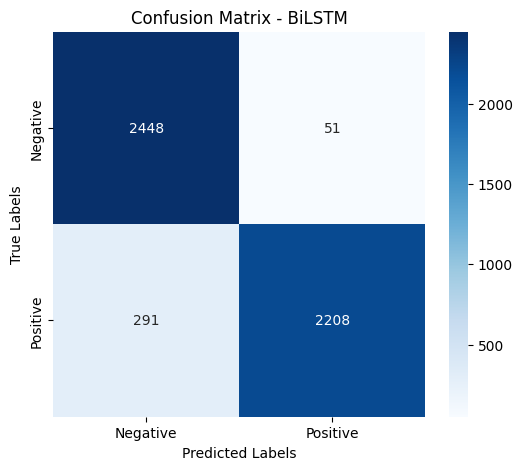

4998


In [ ]:
y_pred1 = (model1.predict(X_test_reshaped) > 0.5).astype(int)
plot_confusion_matrix(y_test, y_pred1, "BiLSTM")
print(len(X_test))

In [ ]:
# from tensorflow.keras.models import load_model

# # Load the saved model
# model1 = load_model('model1.keras')

# # Print the model summary to confirm successful loading
# model1.summary()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import numpy as np

# Evaluate the model on test data
loss, accuracy1 = model1.evaluate(X_test_reshaped, y_test, verbose=1)
print(f"Test Accuracy: {accuracy1:.4f}")

# Get model predictions (probabilities)
y_pred_probs = model1.predict(X_test_reshaped)

# Directly use predicted probabilities (avoid threshold)
y_pred = np.round(y_pred_probs)  # Instead of (y_pred_probs >= 0.5)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9272 - loss: 0.1647
Test Accuracy: 0.9316
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      2499
           1       0.98      0.88      0.93      2499

    accuracy                           0.93      4998
   macro avg       0.94      0.93      0.93      4998
weighted avg       0.94      0.93      0.93      4998



### Model 2: **WIREnet**

In [ ]:
X_train,X_Test,Y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,shuffle=True,random_state=42)
X_train.shape[1]
print(Y_train.value_counts(), y_test.value_counts())

LABEL
1    9994
0    9994
Name: count, dtype: int64 LABEL
0    2499
1    2499
Name: count, dtype: int64


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_Test)
X_train_std = X_train_std.reshape((X_train_std.shape[0], X_train_std.shape[1], 1))
X_test_std = X_test_std.reshape((X_test_std.shape[0], X_test_std.shape[1], 1))

In [ ]:
def WIRENetSpoofImprovedEnhanced(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv1D(64, 3, activation="relu", padding="same")(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(128, 3, activation="relu", padding="same")(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(256, 3, activation="relu", padding="same")(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = Dropout(0.5)(x)
    x = Conv1D(512, 3, activation="relu", padding="same")(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.5)(x)
    x = Conv1D(64, 3, activation="relu", padding="same")(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(128, 3, activation="relu", padding="same")(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(256, 3, activation="relu", padding="same")(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = Dropout(0.5)(x)
    x = Conv1D(512, 3, activation="relu", padding="same")(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = GlobalAveragePooling1D()(x)
    x = Dense(256, activation="relu", kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation="sigmoid")(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model
input_shape = (X_train_std.shape[1], 1)
def lr_schedule(epoch, lr):
    if epoch > 0 and epoch % 10 == 0:
        return lr * 0.1
    return lr
model2 = WIRENetSpoofImprovedEnhanced(input_shape)
model2.compile(
    optimizer = tf.keras.optimizers.AdamW(learning_rate=0.00003),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history2 = model2.fit(
    X_train_std,
    Y_train,
    epochs=50,
    batch_size=128,
)

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.5798 - loss: 4.1093
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7680 - loss: 3.5976
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8434 - loss: 3.2165
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8812 - loss: 2.9040
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9037 - loss: 2.6353
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9167 - loss: 2.3905
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9290 - loss: 2.1655
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9369 - loss: 1.9542
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9403 - loss: 1.7644
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9527 - loss: 1.5842
Epoch 11/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9581 - loss: 1.4159
Epoch 12/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# from tensorflow.keras.models import load_model

# # Load the saved model
# model2 = load_model('model2.keras')

# # Print the model summary to confirm successful loading
# model2.summary()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import numpy as np

# Evaluate the model on test data
loss, accuracy2 = model2.evaluate(X_test_std, y_test, verbose=1)
print(f"Test Accuracy: {accuracy2:.4f}")

# Get model predictions (probabilities)
y_pred_probs = model2.predict(X_test_std)

# Use np.round() instead of a manual threshold
y_pred = np.round(y_pred_probs)  # Automatically rounds (0.49 → 0, 0.51 → 1)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9733 - loss: 0.1073
Test Accuracy: 0.9728
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2499
           1       0.97      0.97      0.97      2499

    accuracy                           0.97      4998
   macro avg       0.97      0.97      0.97      4998
weighted avg       0.97      0.97      0.97      4998



157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


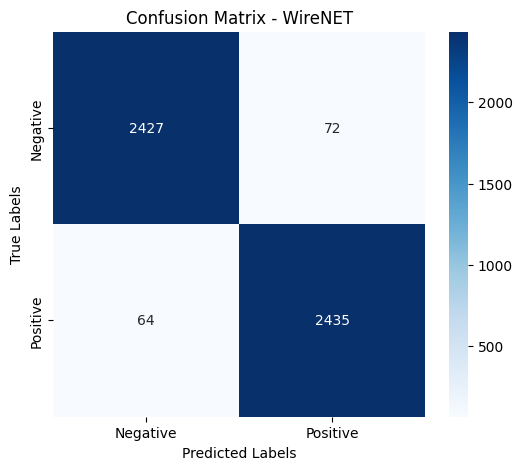

4998


In [ ]:
y_pred2 = (model2.predict(X_test_std) > 0.5).astype(int)
plot_confusion_matrix(y_test, y_pred2, "WireNET")
print(len(X_test_std))

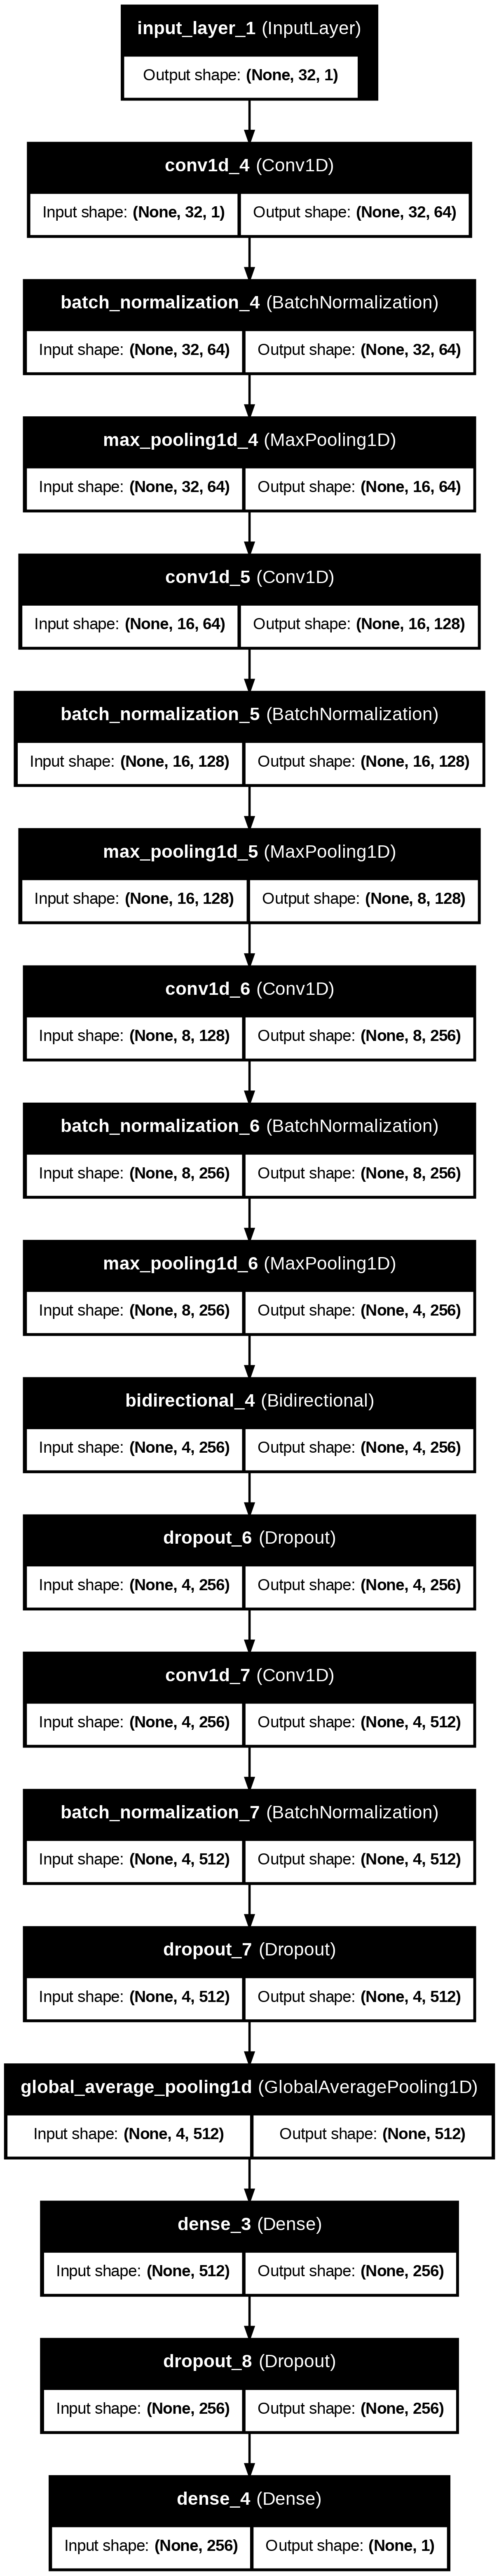

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model2, to_file='wirenet_architecture.png', show_shapes=True, show_layer_names=True)

### Model 3: **Random** **Forest** **Classifier**

In [ ]:
X_train,X_Test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,shuffle=True,random_state=42)
X_train.shape[1]
print(Y_train.value_counts(), y_test.value_counts())

LABEL
1    9994
0    9994
Name: count, dtype: int64 LABEL
0    2499
1    2499
Name: count, dtype: int64


In [ ]:
rf = RandomForestClassifier(
    n_estimators=72,
    max_depth=10,
    min_samples_split=11,
    min_samples_leaf=7,
    max_features='sqrt',
    random_state=42
)

history3 = rf.fit(X_train, y_train)


train_accuracy = rf.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

Training Accuracy: 0.9616


In [ ]:
y_pred = rf.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred)
print(accuracy3)

0.9283713485394157


In [ ]:
y_pred_new = rf.predict(X_test)

# Compute accuracy
accuracy3 = accuracy_score(y_test, y_pred_new)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_new))

print(f"Test Accuracy: {accuracy3:.4f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      2499
           1       0.97      0.89      0.93      2499

    accuracy                           0.93      4998
   macro avg       0.93      0.93      0.93      4998
weighted avg       0.93      0.93      0.93      4998

Test Accuracy: 0.9284


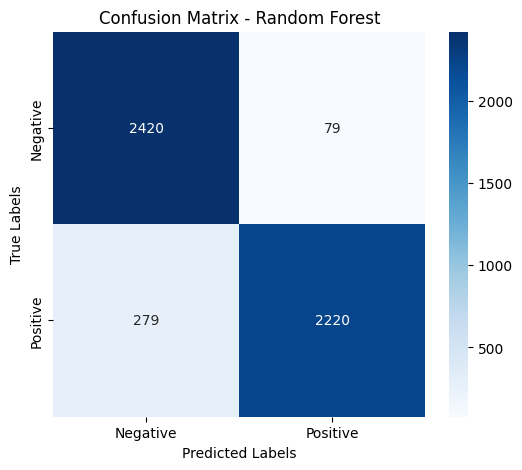

In [ ]:
# Get predictions for Random Forest
y_pred3 = rf.predict(X_test)  # No need for np.argmax()

# Ensure y_test is in the correct format (convert from one-hot if needed)
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)

# Plot Confusion Matrix for Random Forest
plot_confusion_matrix(y_test, y_pred3, "Random Forest")

In [ ]:
import pickle
import json

# Save Random Forest history (history3)
rf_metrics = {
    "train_accuracy": history3.score(X_train, y_train),
    "test_accuracy": history3.score(X_test, y_test)
}
with open("history3_rf26.json", "w") as f:
    json.dump(rf_metrics, f)
print("History3 saved successfully!")

History3 saved successfully!


### Model 4: **SVM** (Support Vector Machine)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(len(X_train),len(X_test))
print(X_train[0])

19988 4998
[ 0.87463581 -0.70562287  0.60437216  0.99803475  1.0648542  -0.10089737
 -0.88777787  0.18106938  0.57777255  0.45576134  0.49668147  0.13518752
 -0.30776298  0.6466523   0.17156159  0.65920899  0.73906867  0.76406192
  0.27374678 -0.72117231  0.50808702 -0.49148421  0.10923498  0.71521541
  0.22290298  0.39606188 -0.13488443 -0.0106982  -0.75370302  0.467911
  0.23446693 -1.48538403]


In [ ]:
svm_classifier = SVC(kernel='rbf', C=3.5,random_state=42)
history4 = svm_classifier.fit(X_train, y_train)

In [ ]:
y_train_pred = svm_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

Training Accuracy: 0.9878


In [ ]:
y_pred = svm_classifier.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred)
print(accuracy4)

0.9779911964785915


In [ ]:
y_pred_new = svm_classifier.predict(X_test)

# Compute accuracy, precision, and recall
accuracy4 = accuracy_score(y_test, y_pred_new)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_new))

print(f"Test Accuracy: {accuracy4:.4f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      2499
           1       0.98      0.97      0.98      2499

    accuracy                           0.98      4998
   macro avg       0.98      0.98      0.98      4998
weighted avg       0.98      0.98      0.98      4998

Test Accuracy: 0.9780


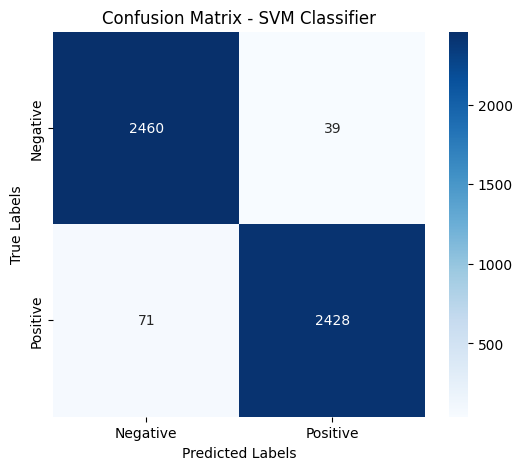

In [ ]:
# Get predictions for SVM Classifier
y_pred_svm = svm_classifier.predict(X_test)  # No need for np.argmax()

# Ensure y_test is in the correct format (convert from one-hot if needed)
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)

# Plot Confusion Matrix for SVM Classifier
plot_confusion_matrix(y_test, y_pred_svm, "SVM Classifier")

In [ ]:
import pickle
import json

# Save SVM history (history4)
svm_metrics = {
    "train_accuracy": history4.score(X_train, y_train),
    "test_accuracy": history4.score(X_test, y_test)
}
with open("history4_svm26.json", "w") as f:
    json.dump(svm_metrics, f)

print("History4 saved successfully!")


History4 saved successfully!


### Model 5: **ResNet** **FC**

In [ ]:
n_samples = min(len(real_df), len(fake_df))

real_df_downsampled = real_df.sample(n=n_samples, random_state=42)
fake_df_downsampled = fake_df.sample(n=n_samples, random_state=42)

balanced_audio_data = pd.concat([real_df_downsampled, fake_df_downsampled]).sample(frac=1, random_state=42)

X = balanced_audio_data.drop(columns=['LABEL'])
y = balanced_audio_data['LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, shuffle=True, random_state=42)
print(len(X_test),len(X_train))

4998 19988


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def res_block(x, units):
    """Residual block for fully connected layers."""
    res = layers.Dense(units, activation='relu')(x)
    res = layers.BatchNormalization()(res)
    res = layers.Dense(units)(res)
    res = layers.BatchNormalization()(res)
    x = layers.Add()([x, res])
    return layers.ReLU()(x)

def ResNetFC(input_shape, num_classes=1):
    inputs = layers.Input(shape=input_shape)
    x = layers.Dense(128, activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = res_block(x, 128)
    x = res_block(x, 128)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)
    return model

input_shape = (X_train.shape[1],)  # Ensure input shape matches feature count
model5 = ResNetFC(input_shape)

# Compile model
model5.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.00003),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
history5 = model5.fit(X_train, y_train, epochs=50, batch_size=128)

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.5329 - loss: 0.8382
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7913 - loss: 0.4554
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8554 - loss: 0.3498
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8819 - loss: 0.2960
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8968 - loss: 0.2606
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9128 - loss: 0.2301
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9197 - loss: 0.2147
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9239 - loss: 0.1995
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9346 - loss: 0.1776
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9394 - loss: 0.1662
Epoch 11/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9412 - loss: 0.1613
Epoch 12/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/st

In [ ]:
# from tensorflow.keras.models import load_model

# # Load the saved model
# model5 = load_model('model5.keras')

# # Print the model summary to confirm successful loading
# model5.summary()

In [ ]:
# Evaluate model
accuracy5 = model5.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy5[1] * 100:.2f}%')

157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9712 - loss: 0.0729
Test Accuracy: 97.42%


In [ ]:
print(len(X_test),len(X_train),len(y_test))

4998 19988 4998


In [ ]:
# Predict using trained ResNetFC model
y_pred_probs = model5.predict(X_test)  # Probabilities from sigmoid layer
y_pred_new = (y_pred_probs > 0.5).astype(int)  # Convert to binary labels

# Compute accuracy, precision, and recall
accuracy5 = accuracy_score(y_test, y_pred_new)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_new))

print(f"Test Accuracy: {accuracy5:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      2499
           1       0.98      0.97      0.97      2499

    accuracy                           0.97      4998
   macro avg       0.97      0.97      0.97      4998
weighted avg       0.97      0.97      0.97      4998

Test Accuracy: 0.9742


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


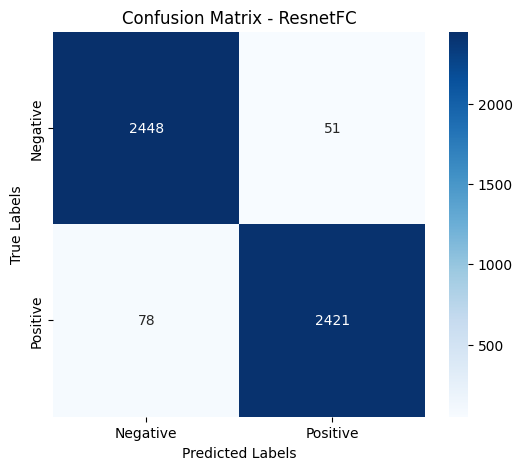

4998


In [ ]:
y_pred5 = (model5.predict(X_test) > 0.5).astype(int)
plot_confusion_matrix(y_test, y_pred5, "ResnetFC")
print(len(X_test))

### Model 6: **SE**-**Enhanced** **1D**-**CNN** **for** **Time** **Series** **Classification**

In [ ]:
n_samples = min(len(real_df), len(fake_df))

real_df_downsampled = real_df.sample(n=n_samples, random_state=42)
fake_df_downsampled = fake_df.sample(n=n_samples, random_state=42)

balanced_audio_data = pd.concat([real_df_downsampled, fake_df_downsampled]).sample(frac=1, random_state=42)

X = balanced_audio_data.drop(columns=['LABEL'])
y = balanced_audio_data['LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, shuffle=True, random_state=42)
print(len(X_test),len(X_train))

4998 19988


In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, BatchNormalization, LeakyReLU, MaxPooling2D, Flatten,
                                     Dense, Add, GlobalAveragePooling2D, Reshape, Dropout, Multiply)
from tensorflow.keras.regularizers import l2
from imblearn.over_sampling import SMOTE  # New: Synthetic Oversampling
from tensorflow.keras.optimizers.schedules import CosineDecay  # New: Better LR Scheduler

# Load and encode primary dataset
df = pd.read_csv(data_file)
label_encoder = LabelEncoder()
df['LABEL'] = label_encoder.fit_transform(df['LABEL'])

real_df = df[df['LABEL'] == 1]
fake_df = df[df['LABEL'] == 0]

n_samples = min(len(real_df), len(fake_df))

real_df_downsampled = real_df.sample(n=n_samples, random_state=42)
fake_df_downsampled = fake_df.sample(n=n_samples, random_state=42)

balanced_audio_data = pd.concat([real_df_downsampled, fake_df_downsampled]).sample(frac=1, random_state=42)

X = balanced_audio_data.drop(columns=['LABEL'])
y = balanced_audio_data['LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, shuffle=True, random_state=42)
# # Select features & labels
# feature_columns = df.columns[:-1]
# X = df[feature_columns].values
# y = df["LABEL"].values

# # Apply SMOTE for better class balance
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into train, validation, and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Reshape for CNN input (Batch, Time, Features)
X_train_reshaped = np.expand_dims(X_train, axis=1)
X_test_reshaped = np.expand_dims(X_test, axis=1)

# Convert labels to one-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [ ]:
X_test_reshaped.shape

(4998, 1, 32)

In [ ]:
# Define custom Focal Loss to handle class imbalance
def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        epsilon = 1e-6
        y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)
        pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        loss = -alpha * (1 - pt) ** gamma * tf.math.log(pt)
        return tf.reduce_sum(loss, axis=-1)
    return loss

# Define Cosine Learning Rate Scheduler
# initial_learning_rate = 0.005
# lr_schedule = CosineDecay(initial_learning_rate, decay_steps=1000, alpha=0.0001)

# Number of features
num_features = X_train_reshaped.shape[-1]

# Define Model Architecture with Residual Connections
input_layer = Input(shape=(1, num_features, 1))  # (Time, Features, Channel)

# Conv Block 1
x = Conv2D(64, (1, 3), padding="same", kernel_regularizer=l2(0.001))(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = MaxPooling2D(pool_size=(1, 2))(x)
x = Dropout(0.3)(x)

# Residual Block 1
res = Conv2D(64, (1, 3), padding="same", kernel_regularizer=l2(0.001))(x)
res = BatchNormalization()(res)
res = LeakyReLU()(res)
res = Conv2D(64, (1, 3), padding="same", kernel_regularizer=l2(0.001))(res)
res = BatchNormalization()(res)
x = Add()([x, res])  # Residual Connection
x = LeakyReLU()(x)

# Conv Block 2
x = Conv2D(128, (1, 3), padding="same", kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = MaxPooling2D(pool_size=(1, 2))(x)
x = Dropout(0.3)(x)

# Squeeze-and-Excitation (SE) Attention
se = GlobalAveragePooling2D()(x)
se = Dense(64, activation="relu")(se)
se = Dense(128, activation="sigmoid")(se)
se = Reshape((1, 1, 128))(se)
x = Multiply()([x, se])

# Fully Connected Layers
x = Flatten()(x)
x = Dense(128, activation="relu", kernel_regularizer=l2(0.001))(x)
x = Dropout(0.4)(x)
x = Dense(64, activation="relu", kernel_regularizer=l2(0.001))(x)
x = Dropout(0.4)(x)

# Output Layer
output_layer = Dense(y_train_categorical.shape[1], activation="softmax")(x)

# Build Model
model6 = Model(inputs=input_layer, outputs=output_layer)

# Compile Model with Focal Loss
model6.compile(loss=focal_loss(), optimizer=tf.keras.optimizers.AdamW(learning_rate=0.00003), metrics=["accuracy"])
model6.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 1, 32, 1)       │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 1, 32, 64)      │            256 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_15    │ (None, 1, 32, 64)      │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu (LeakyReLU)   │ (None, 1, 32, 64)      │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 1, 16, 64)      │              0 │ leaky_re_lu[0][0]      │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_9 (Dropout)       │ (None, 1, 16, 64)      │              0 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 1, 16, 64)      │         12,352 │ dropout_9[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_16    │ (None, 1, 16, 64)      │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_1 (LeakyReLU) │ (None, 1, 16, 64)      │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 1, 16, 64)      │         12,352 │ leaky_re_lu_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_17    │ (None, 1, 16, 64)      │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 1, 16, 64)      │              0 │ dropout_9[0][0],       │
│                           │                        │                │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_2 (LeakyReLU) │ (None, 1, 16, 64)      │              0 │ add_2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 1, 16, 128)     │         24,704 │ leaky_re_lu_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_18    │ (None, 1, 16, 128)     │            512 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_3 (LeakyReLU) │ (None, 1, 16, 128)     │              0 │ batch_normalization_1… │
├──────────────────────

 Total params: 207,106 (809.01 KB)

 Trainable params: 206,466 (806.51 KB)

 Non-trainable params: 640 (2.50 KB)

In [ ]:
# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=1e-5)

# Train Model
history6 = model6.fit(
    X_train_reshaped, y_train_categorical,
    epochs=50,
    batch_size=64,
)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.5335 - loss: 0.6993
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6432 - loss: 0.6072
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7084 - loss: 0.5804
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7579 - loss: 0.5571
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7908 - loss: 0.5352
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8125 - loss: 0.5159
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8260 - loss: 0.4957
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8376 - loss: 0.4760
Epoch 9/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8423 - loss: 0.4564
Epoch 10/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8502 - loss: 0.4377
Epoch 11/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8625 - loss: 0.4164
Epoch 12/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/st

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import load_model
# from tensorflow.keras.layers import Dense, Multiply
# from tensorflow.keras.optimizers.schedules import CosineDecay

# # Define Custom Focal Loss
# def focal_loss(alpha=0.25, gamma=2.0):
#     def loss(y_true, y_pred):
#         epsilon = 1e-6
#         y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)
#         pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
#         loss = -alpha * (1 - pt) ** gamma * tf.math.log(pt)
#         return tf.reduce_sum(loss, axis=-1)  # Match the function definition used in training
#     return loss

# # Load the saved model
# model6 = tf.keras.models.load_model("model6.keras", custom_objects={"loss": focal_loss()})

# # Verify model architecture
# model6.summary()

In [ ]:

# Generate classification reports
y_test_pred = np.argmax(model6.predict(X_test_reshaped), axis=1)
accuracy6 = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy6:.4f}")
unique_labels = np.unique(np.concatenate((y_test, y_test_pred)))
print("Test Set Classification Report:")
print(classification_report(y_test, y_test_pred, labels=unique_labels))

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Test Accuracy: 0.9718
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2499
           1       0.99      0.96      0.97      2499

    accuracy                           0.97      4998
   macro avg       0.97      0.97      0.97      4998
weighted avg       0.97      0.97      0.97      4998



157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


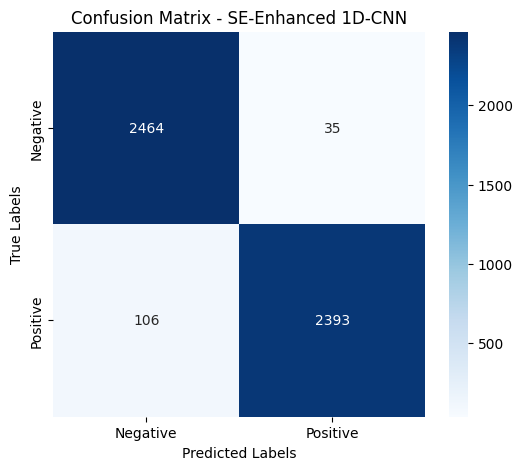

In [ ]:
# Model 6 SE-Enhanced 1D-CNN for Time Series Classification
y_pred6 = np.argmax(model6.predict(X_test_reshaped), axis=1)
plot_confusion_matrix(y_test, y_pred6, "SE-Enhanced 1D-CNN")

In [ ]:
audio_data = pd.read_csv(data_file)

label_encoder = LabelEncoder()
audio_data['LABEL'] = label_encoder.fit_transform(audio_data['LABEL'])

y = audio_data['LABEL']
X = audio_data.drop('LABEL', axis = 1)

real_df = audio_data[audio_data['LABEL'] == 1]
fake_df = audio_data[audio_data['LABEL'] == 0]

fake_df_downsampled = fake_df.sample(n=len(real_df), random_state=42)

balanced_audio_data = pd.concat([real_df, fake_df_downsampled]).sample(frac=1, random_state=42)

X = balanced_audio_data.drop(columns=['LABEL'])
y = balanced_audio_data['LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

print(y_train.value_counts(), y_test.value_counts())

LABEL
0    10020
1     9968
Name: count, dtype: int64 LABEL
1    2525
0    2473
Name: count, dtype: int64


In [ ]:
print("X_train shape:", X_train.shape)  # (samples, 1, 26, 10)
print("y_train shape:", y_train.shape)  # (samples,)

X_train shape: (19988, 32)
y_train shape: (19988,)


In [ ]:
import numpy as np

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Reshape to (samples, 13, 2, 1)
X_train = X_train.reshape((X_train.shape[0], 16, 2, 1))
X_test = X_test.reshape((X_test.shape[0], 16, 2, 1))

print("X_train_reshaped shape:", X_train_reshaped.shape)  # Expected: (4128, 13, 2, 1)
print("X_test_reshaped shape:", X_test_reshaped.shape)  # Expected: (samples, 13, 2, 1)

X_train_reshaped shape: (19988, 1, 32)
X_test_reshaped shape: (4998, 1, 32)


In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Ensure labels are one-hot encoded
NUM_CLASSES = len(np.unique(y_train))  # Get the number of unique classes
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

# # Reshape X_train for CNN input
# X_train = X_train.reshape((X_train.shape[0], 16, 2, 1))
# X_test = X_test.reshape((X_test.shape[0], 16, 2, 1))

# Define the CNN input shape
input_shape = (16, 2, 1)

print("X_train shape:", X_train.shape)  # Should be (num_samples, 13, 2, 1)
print("y_train shape:", y_train.shape)  # Should be (num_samples, NUM_CLASSES)

X_train shape: (19988, 16, 2, 1)
y_train shape: (19988, 2)


### Model 7: **Custom** **CNN**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.utils import to_categorical

# Define input shape
input_shape = (16, 2, 1)  # (Height=13, Width=2, Channels=1)

# Input layer
model_input = Input(shape=input_shape)

# First Conv layer with L2 regularization
x = Conv2D(32, kernel_size=(2, 2), activation='relu', padding='same', kernel_regularizer=l2(0.004))(model_input)
x = MaxPooling2D(pool_size=(2, 1), padding='same')(x)  # Pool over height only

# Second Conv layer with L2 regularization
x = Conv2D(64, kernel_size=(2, 1), activation='relu', padding='same', kernel_regularizer=l2(0.004))(x)
x = MaxPooling2D(pool_size=(2, 1), padding='same')(x)

# Flatten and Dense layers with L2 regularization
x = Flatten()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.004))(x)
x = Dropout(0.5)(x)  # Dropout for regularization

# Output layer
model_output = Dense(NUM_CLASSES, activation='softmax')(x)

# # Define learning rate schedule
# lr_schedule = ExponentialDecay(initial_learning_rate=0.00001, decay_steps=1000, decay_rate=0.96, staircase=True)

# Define and compile model
model7 = Model(inputs=model_input, outputs=model_output)
model7.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.00003), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model7.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 16, 2, 1)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 2, 32)           │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 2, 64)            │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70,242 (274.38 KB)

 Trainable params: 70,242 (274.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history7 = model7.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.6687 - loss: 1.5593 - val_accuracy: 0.8399 - val_loss: 1.2083
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8368 - loss: 1.1372 - val_accuracy: 0.8673 - val_loss: 0.9399
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8586 - loss: 0.9106 - val_accuracy: 0.8820 - val_loss: 0.7894
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8700 - loss: 0.7781 - val_accuracy: 0.8906 - val_loss: 0.6970
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8838 - loss: 0.6885 - val_accuracy: 0.8952 - val_loss: 0.6358
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8886 - loss: 0.6317 - val_accuracy: 0.8988 - val_loss: 0.5910
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8906 - loss: 0.5895 - val_accuracy: 0.9008 - val_loss: 0.5557
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9021 - loss: 0.5529 - val_accuracy: 0.

In [ ]:
# model7 = tf.keras.models.load_model("model7.keras")
# model7.summary()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Predict class probabilities
y_pred_probs = model7.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy7 = accuracy_score(y_true, y_pred)
print(f"Model Accuracy: {accuracy7:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Model Accuracy: 0.9446
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2473
           1       0.96      0.93      0.94      2525

    accuracy                           0.94      4998
   macro avg       0.94      0.94      0.94      4998
weighted avg       0.94      0.94      0.94      4998



157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


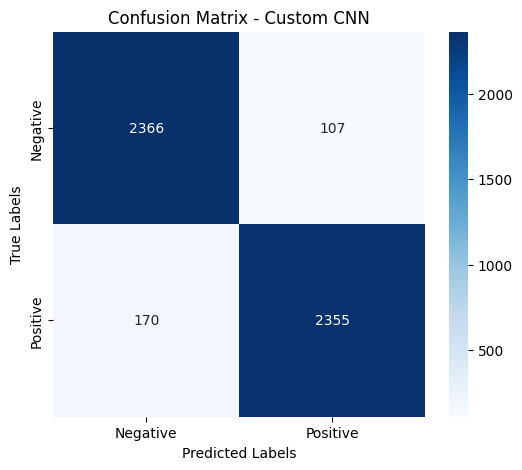

In [ ]:
# Convert one-hot encoded y_test to class labels
if len(y_test.shape) > 1 and y_test.shape[1] > 1:  # Check if y_test is one-hot
    y_test = np.argmax(y_test, axis=1)

# Get predictions for Custom CNN (Model 7)
y_pred7 = np.argmax(model7.predict(X_test), axis=1)  # Convert probabilities to class labels

# Plot Confusion Matrix for Custom CNN
plot_confusion_matrix(y_test, y_pred7, "Custom CNN")


### Model 8: **ResCNN**-**Attention**-**BiGRU**

In [ ]:
audio_data = pd.read_csv(data_file)

label_encoder = LabelEncoder()
audio_data['LABEL'] = label_encoder.fit_transform(audio_data['LABEL'])

y = audio_data['LABEL']
X = audio_data.drop('LABEL', axis = 1)

real_df = audio_data[audio_data['LABEL'] == 1]
fake_df = audio_data[audio_data['LABEL'] == 0]

fake_df_downsampled = fake_df.sample(n=len(real_df), random_state=42)

balanced_audio_data = pd.concat([real_df, fake_df_downsampled]).sample(frac=1, random_state=42)

X = balanced_audio_data.drop(columns=['LABEL'])
y = balanced_audio_data['LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

print(y_train.value_counts(), y_test.value_counts())

LABEL
0    10020
1     9968
Name: count, dtype: int64 LABEL
1    2525
0    2473
Name: count, dtype: int64


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load Dataset
df = pd.read_csv(data_file)

# Encode Labels
label_encoder = LabelEncoder()
df["LABEL"] = label_encoder.fit_transform(df["LABEL"])

# Downsample Fake Data to Match Real Data
real_df = df[df["LABEL"] == 1]
fake_df = df[df["LABEL"] == 0]
fake_df_downsampled = fake_df.sample(n=len(real_df), random_state=42)

# Combine and Shuffle Balanced Dataset
balanced_df = pd.concat([real_df, fake_df_downsampled]).sample(frac=1, random_state=42)

# Extract Features & Labels
X = balanced_df.drop(columns=["LABEL"]).values
y = balanced_df["LABEL"].values

# Normalize Features (Zero Mean, Unit Variance)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

# Reshape for Conv1D (Batch, Time, Features)
X_train_reshaped = np.expand_dims(X_train, axis=-1)  # (Batch, Time_Steps, Features)
X_test_reshaped = np.expand_dims(X_test, axis=-1)

# Convert Labels to One-Hot Encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

print("Final Data Shapes:")
print(f"X_train: {X_train_reshaped.shape}, y_train: {y_train_categorical.shape}")
print(f"X_test: {X_test_reshaped.shape}, y_test: {y_test_categorical.shape}")


Final Data Shapes:
X_train: (19988, 32, 1), y_train: (19988, 2)
X_test: (4998, 32, 1), y_test: (4998, 2)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv1D, BatchNormalization, Activation, Dropout, Dense,
                                     Add, GlobalAveragePooling1D, Multiply, GRU, Bidirectional)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers.schedules import CosineDecay
import numpy as np

# Define Custom Focal Loss for Imbalanced Data
def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        epsilon = 1e-6
        y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)
        pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        loss = -alpha * (1 - pt) ** gamma * tf.math.log(pt)
        return tf.reduce_mean(loss)
    return loss

# Self-Attention Mechanism (for sequence learning)
def self_attention(x):
    attn_weights = Dense(x.shape[-1], activation="softmax")(x)
    return Multiply()([x, attn_weights])

# Learning Rate Warmup + Cosine Decay
def warmup_cosine_decay(lr_start=1e-4, lr_max=0.005, warmup_epochs=5, total_epochs=50):
    def scheduler(epoch):
        if epoch < warmup_epochs:
            return lr_start + (lr_max - lr_start) * (epoch / warmup_epochs)
        else:
            return lr_max * 0.5 * (1 + np.cos(np.pi * (epoch - warmup_epochs) / (total_epochs - warmup_epochs)))
    return tf.keras.callbacks.LearningRateScheduler(scheduler)

# Input Shape
num_features = X_train_reshaped.shape[1]  # Number of Time Steps (e.g., MFCCs)
num_channels = X_train_reshaped.shape[-1]  # 1 for mono audio features

input_layer = Input(shape=(num_features, num_channels))  # (Time, Features)

# Conv Block 1 (Feature Extraction)
x = Conv1D(64, kernel_size=5, strides=1, padding="same", kernel_regularizer=l2(0.001))(input_layer)
x = BatchNormalization()(x)
x = Activation("swish")(x)
x = Dropout(0.3)(x)

# Residual Block 1
res = Conv1D(64, kernel_size=5, padding="same", kernel_regularizer=l2(0.001))(x)
res = BatchNormalization()(res)
res = Activation("swish")(res)
res = Conv1D(64, kernel_size=5, padding="same", kernel_regularizer=l2(0.001))(res)
res = BatchNormalization()(res)
x = Add()([x, res])  # Residual Connection
x = Activation("swish")(x)

# Conv Block 2 (Higher-level Features)
x = Conv1D(128, kernel_size=5, strides=2, padding="same", kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = Activation("swish")(x)
x = Dropout(0.3)(x)

# Self-Attention for Feature Enhancement
x = self_attention(x)

# BiGRU Layer (Sequence Learning)
x = Bidirectional(GRU(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(x)

# Global Feature Pooling
x = GlobalAveragePooling1D()(x)

# Fully Connected Layers
x = Dense(128, activation="swish", kernel_regularizer=l2(0.001))(x)
x = Dropout(0.4)(x)
x = Dense(64, activation="swish", kernel_regularizer=l2(0.001))(x)
x = Dropout(0.4)(x)

# Output Layer
output_layer = Dense(y_train_categorical.shape[1], activation="softmax")(x)

# Build Model
model8 = Model(inputs=input_layer, outputs=output_layer)

# Compile Model with Focal Loss
model8.compile(loss=focal_loss(), optimizer=tf.keras.optimizers.AdamW(learning_rate=0.00003), metrics=["accuracy"])

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)
lr_scheduler = warmup_cosine_decay()

# Train Model
history8 = model8.fit(
    X_train_reshaped, y_train_categorical,
    validation_data=(X_test_reshaped, y_test_categorical),
    epochs=50,
    batch_size=128,
    callbacks=[early_stopping, lr_scheduler]
)


Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 33s 125ms/step - accuracy: 0.5145 - loss: 0.4313 - val_accuracy: 0.5052 - val_loss: 0.3274 - learning_rate: 1.0000e-04
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 37s 121ms/step - accuracy: 0.6398 - loss: 0.1746 - val_accuracy: 0.7317 - val_loss: 0.0536 - learning_rate: 0.0011
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 126ms/step - accuracy: 0.8089 - loss: 0.0400 - val_accuracy: 0.7981 - val_loss: 0.0388 - learning_rate: 0.0021
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 126ms/step - accuracy: 0.8151 - loss: 0.0396 - val_accuracy: 0.7823 - val_loss: 0.0397 - learning_rate: 0.0030
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 121ms/step - accuracy: 0.8362 - loss: 0.0372 - val_accuracy: 0.8417 - val_loss: 0.0345 - learning_rate: 0.0040
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 122ms/step - accuracy: 0.8369 - loss: 0.0374 - val_accuracy: 0.8651 - val_loss: 0.0352 - learning_rate: 0.0050
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - accuracy:

In [ ]:
# model8 = tf.keras.models.load_model("model8.keras", custom_objects={"loss": focal_loss()})
# model8.summary()

In [ ]:
# Evaluate the model on the test set
test_loss, accuracy8 = model8.evaluate(X_test_reshaped, y_test_categorical, verbose=1)

# Print accuracy
print(f"Test Accuracy: {accuracy8 * 100:.2f}%")

# Generate predictions
y_pred = model8.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true_classes = np.argmax(y_test_categorical, axis=1)  # Convert one-hot labels to class labels

# Classification Report
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:\n", classification_report(y_true_classes, y_pred_classes))

157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9588 - loss: 0.0090
Test Accuracy: 95.96%
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      2473
           1       0.97      0.95      0.96      2525

    accuracy                           0.96      4998
   macro avg       0.96      0.96      0.96      4998
weighted avg       0.96      0.96      0.96      4998



157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step


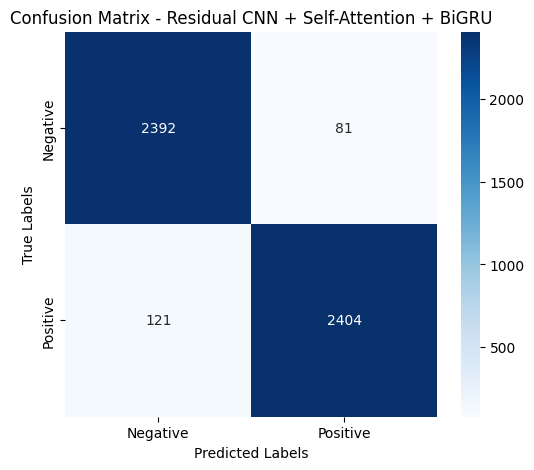

In [ ]:
# Get predictions for ResCNN-Attn-BiGRU
y_pred8 = np.argmax(model8.predict(X_test_reshaped), axis=1)  # Convert probabilities to class labels

# Plot Confusion Matrix for ResCNN-Attn-BiGRU
plot_confusion_matrix(y_test, y_pred8, "Residual CNN + Self-Attention + BiGRU")

In [ ]:
import tensorflow as tf

# Dictionary of model names and objects
models = {
    "model1_26": model1,
    "model2_26": model2,
    "model5_26": model5,
    "model6_26": model6,
    "model7_26": model7
}

# Save each model using its actual name
for name, model in models.items():
    model.save(f"{name}.keras")  # Save using Keras format
    print(f"{name} saved as {name}.keras")

model1_26 saved as model1_26.keras
model2_26 saved as model2_26.keras
model5_26 saved as model5_26.keras
model6_26 saved as model6_26.keras
model7_26 saved as model7_26.keras


In [ ]:
model8.save("model8_26.keras")

In [ ]:
import joblib

# Save Random Forest model
joblib.dump(rf, 'random_forest_model_26.pkl')
print("Random Forest model saved as random_forest_model.pkl")

# Save SVM model
joblib.dump(svm_classifier, 'svm_model_26.pkl')
print("SVM model saved as svm_model.pkl")

Random Forest model saved as random_forest_model.pkl
SVM model saved as svm_model.pkl


In [ ]:
import pickle
import json

# Save Keras model histories (history1, history2, history5, history6, history7)
for i in [1, 2,5 ,6 ,7, 8]:
    with open(f"history{i}_26.json", "w") as f:
        json.dump(eval(f"history{i}.history"), f)
print("All histories 1, 2, 5, 6, 7, 8 saved successfully!")

All histories 1, 2, 5, 6, 7, 8 saved successfully!


In [ ]:
# import json

# # Function to load history from a JSON file
# def load_history(file_name):
#     with open(file_name, "r") as f:
#         history = json.load(f)
#     return history

# # Load histories
# history1 = load_history("history1.json")
# history2 = load_history("history2.json")
# history5 = load_history("history5.json")
# history6 = load_history("history6.json")
# history7 = load_history("history7.json")
# history8 = load_history("history8.json")

# # Print keys to check the loaded data
# print(history1.keys())

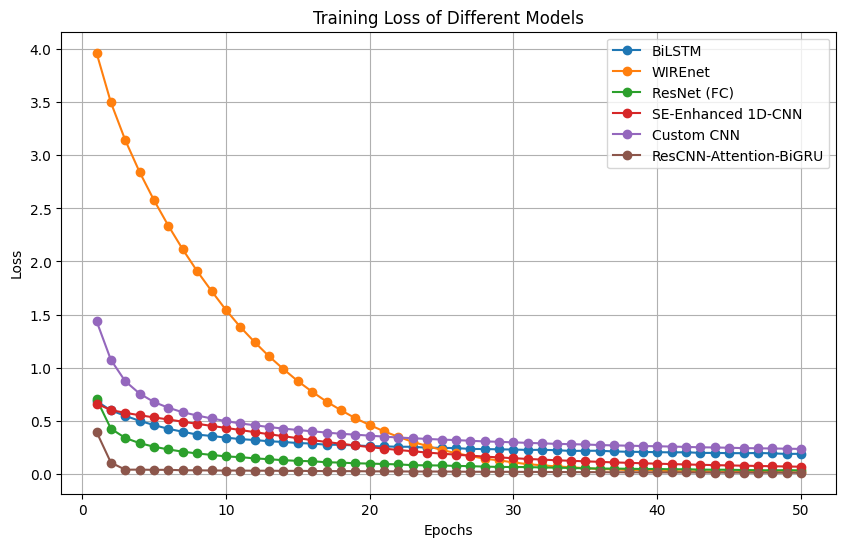

In [ ]:
# Extract loss values correctly
models_loss = {
    "BiLSTM": history1.history['loss'],
    "WIREnet": history2.history['loss'],
    "ResNet (FC)": history5.history['loss'],
    "SE-Enhanced 1D-CNN": history6.history['loss'],
    "Custom CNN": history7.history['loss'],
    "ResCNN-Attention-BiGRU": history8.history['loss']
}

epochs = range(1, len(next(iter(models_loss.values()))) + 1)  # Get number of epochs

plt.figure(figsize=(10, 6))

for model_name, loss in models_loss.items():
    plt.plot(epochs, loss, marker='o', label=model_name)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss of Different Models")
plt.legend()
plt.grid()
plt.show()


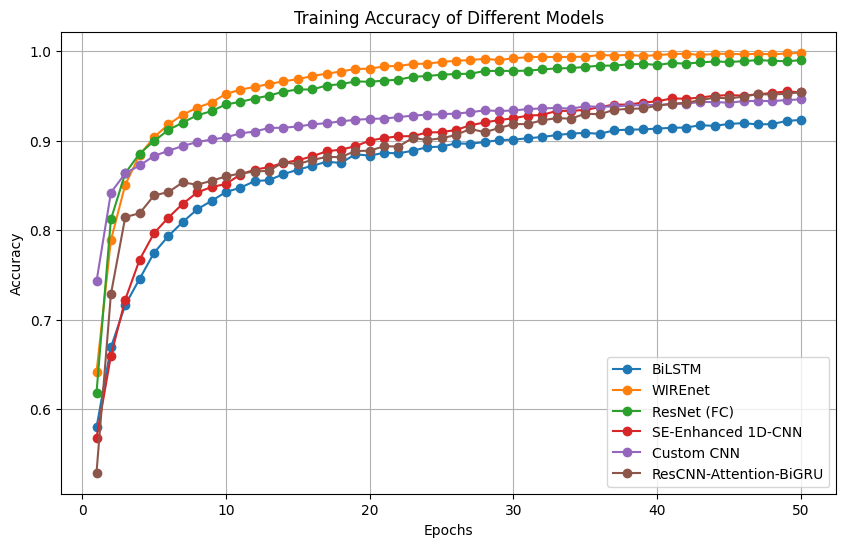

In [ ]:
# Extract accuracy values correctly
models_accuracy = {
    "BiLSTM": history1.history['accuracy'],
    "WIREnet": history2.history['accuracy'],
    "ResNet (FC)": history5.history['accuracy'],
    "SE-Enhanced 1D-CNN": history6.history['accuracy'],
    "Custom CNN": history7.history['accuracy'],
    "ResCNN-Attention-BiGRU": history8.history['accuracy']
}

epochs = range(1, len(next(iter(models_accuracy.values()))) + 1)  # Get number of epochs

plt.figure(figsize=(10, 6))

for model_name, acc in models_accuracy.items():
    plt.plot(epochs, acc, marker='o', label=model_name)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy of Different Models")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Extract training accuracies from history objects (Keras models)
model_names = ["BiLSTM", "WireNet", "ResnetFC", "SE-Enhanced 1D-CNN", "Custom CNN", "ResCNN-Attention-BiGRU"]
train_accuracies = [
    max(history1.history['accuracy']),
    max(history2.history['accuracy']),
    max(history5.history['accuracy']),
    max(history6.history['accuracy']),
    max(history7.history['accuracy']),
    max(history8.history['accuracy'])
]

In [ ]:
!pip install adjustText

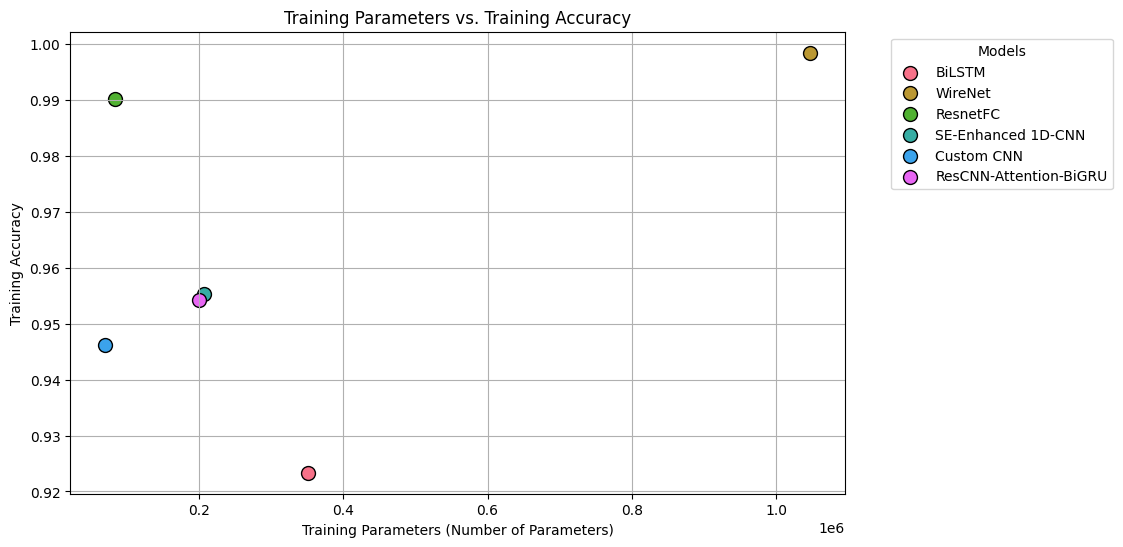

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from adjustText import adjust_text

# Ensure the models are trained before extracting these values
parameters = [
    model1.count_params(),
    model2.count_params(),
    model5.count_params(),
    model6.count_params(),
    model7.count_params(),
    model8.count_params()
]

colors = sns.color_palette("husl", len(model_names))  # Generate unique colors for each model

# Set figure
plt.figure(figsize=(10, 6))

# Plot each model with a different color
for i, model in enumerate(model_names):
    plt.scatter(parameters[i], train_accuracies[i], color=colors[i], s=100, edgecolor='black', label=model)

# Labels & Title
plt.xlabel("Training Parameters (Number of Parameters)")
plt.ylabel("Training Accuracy")
plt.title("Training Parameters vs. Training Accuracy")

# Add legend
plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.show()

In [ ]:
# Extract training accuracies
accuracies2 = [
    accuracy1,
    accuracy2,
    accuracy5,
    accuracy6,
    accuracy7,
    accuracy8
]

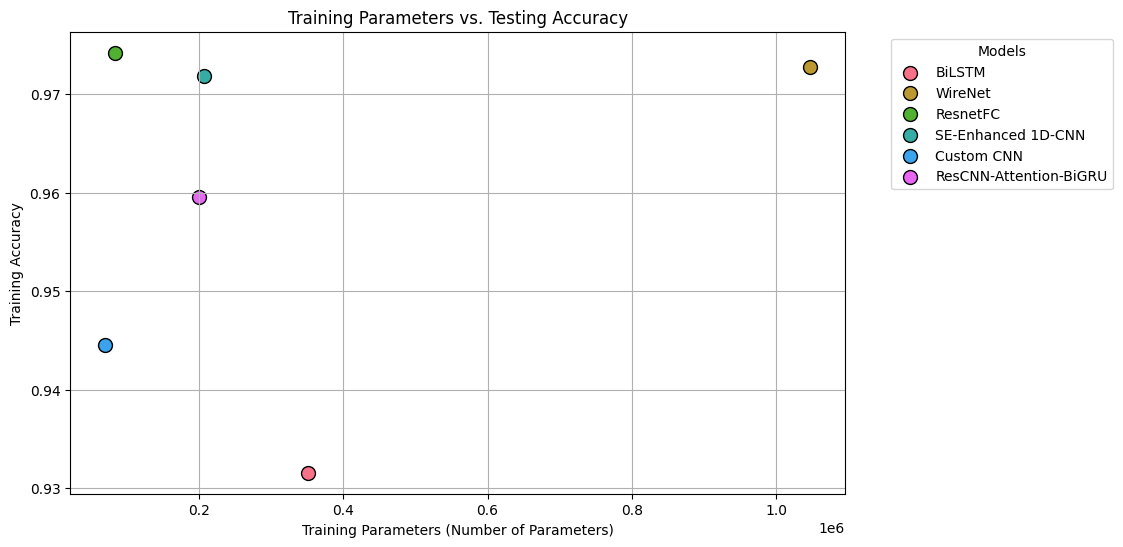

In [ ]:
colors = sns.color_palette("husl", len(model_names))

# Set figure
plt.figure(figsize=(10, 6))

# Plot each model with a different color
for i, model in enumerate(model_names):
    plt.scatter(parameters[i], accuracies2[i], color=colors[i], s=100, edgecolor='black', label=model)

# Labels & Title
plt.xlabel("Training Parameters (Number of Parameters)")
plt.ylabel("Training Accuracy")
plt.title("Training Parameters vs. Testing Accuracy")

# Add legend
plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.show()

<ipython-input-92-7c93c1d7f031>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=parameters, palette="husl")


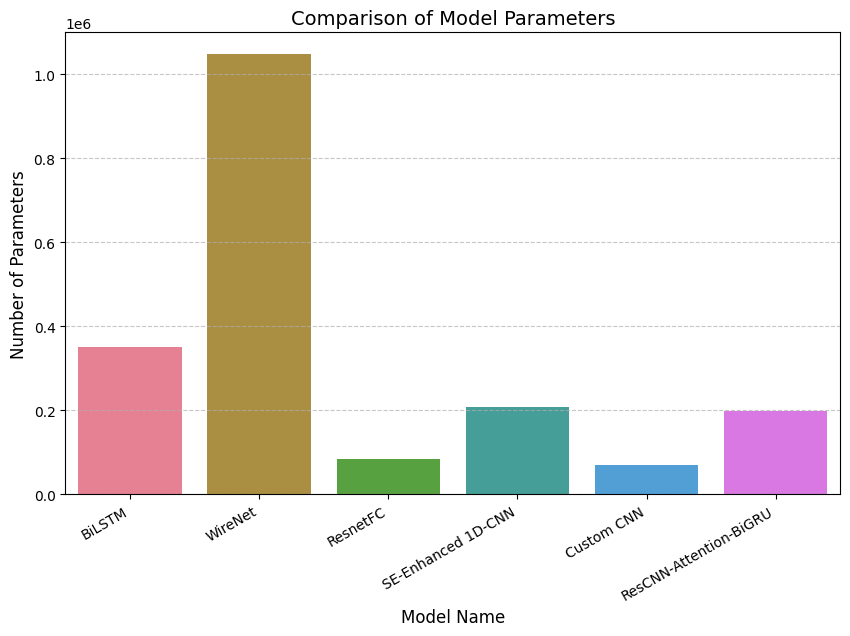

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=parameters, palette="husl")

# Labels and title
plt.xlabel("Model Name", fontsize=12)
plt.ylabel("Number of Parameters", fontsize=12)
plt.title("Comparison of Model Parameters", fontsize=14)
plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()